In [1]:
! pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 50.5 MB/s eta 0:00:00


In [12]:
import rasterio

# Abre el archivo GeoTIFF
file_path = '/content/pmanure_global.tif'  # Cambia esto a la ruta de tu archivo
with rasterio.open(file_path) as src:
    # Lee los datos del primer canal (puedes cambiar el índice si necesitas otro canal)
    band1 = src.read(1)
    print("Número de bandas:", src.count)
    print("Perfil del archivo:", src.profile)

# Imprime información sobre la imagen
print("Forma de la banda:", band1.shape)
print("Valores de píxel:", band1)

# Si deseas acceder a un píxel específico, por ejemplo, en la posición (fila, columna)
# fila = 100  # Cambia esto a la fila deseada
# columna = 150  # Cambia esto a la columna deseada
# valor_pixel = band1[fila, columna]
# print(f"Valor del píxel en ({fila}, {columna}):", valor_pixel)


Número de bandas: 1
Perfil del archivo: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 720, 'height': 279, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.5000000000000003, 0.0, -180.00000000000006,
       0.0, -0.5000000000000003, 83.73852189469552), 'blockysize': 2, 'tiled': False, 'interleave': 'band'}
Forma de la banda: (279, 720)
Valores de píxel: [[-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 ...
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e

In [6]:
import numpy as np
np.savetxt('test.csv', band1, delimiter=',')

In [46]:
np.unique(np.sort(band1.flatten())[::-1])[0]

-3.4028235e+38

In [47]:
a = np.unique(np.sort(band1.flatten())[::-1])[0]

In [62]:
band1_mod = np.where(band1 == a, -15.0, band1)
band1_mod

array([[-15., -15., -15., ..., -15., -15., -15.],
       [-15., -15., -15., ..., -15., -15., -15.],
       [-15., -15., -15., ..., -15., -15., -15.],
       ...,
       [-15., -15., -15., ..., -15., -15., -15.],
       [-15., -15., -15., ..., -15., -15., -15.],
       [-15., -15., -15., ..., -15., -15., -15.]], dtype=float32)

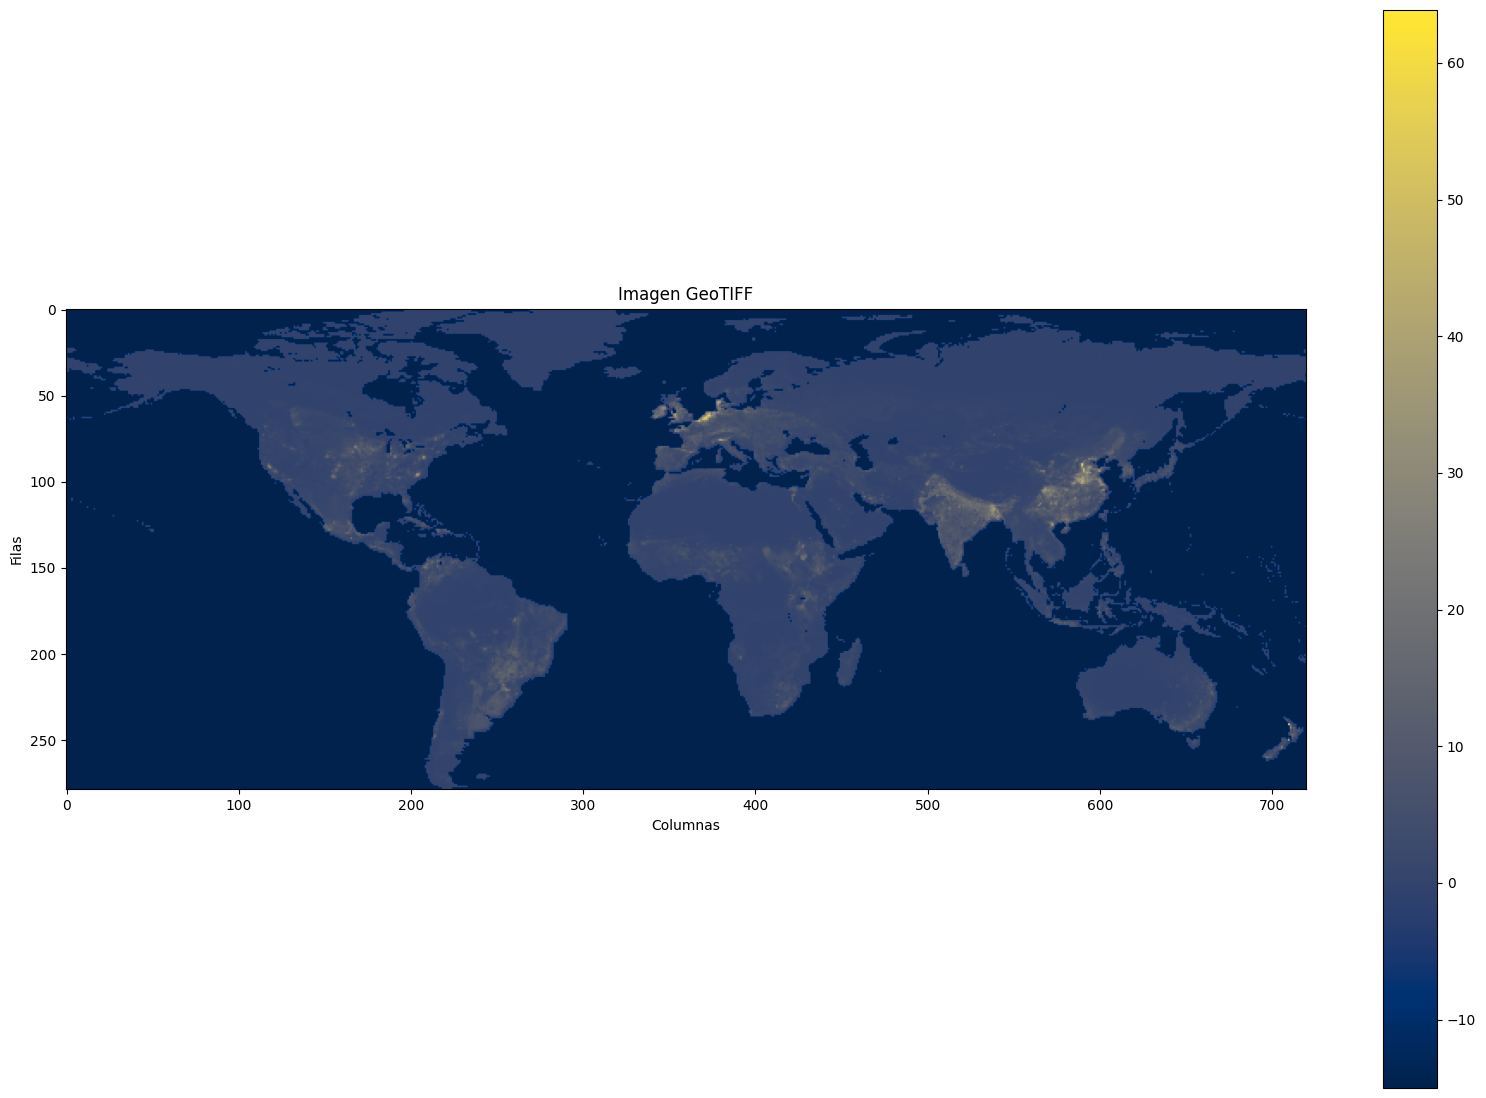

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))

plt.imshow(band1_mod, cmap='cividis')  # Cambia el cmap según tus necesidades
plt.colorbar()
plt.title('Imagen GeoTIFF')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.savefig('xd.png')
plt.show()
